### graphene plasmon dispersion

In [15]:
from sympy import *
from Electromagnetics.VectorCalculus import *
from IPython.display import display, Math, Latex

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc

x, y, z = symbols('x y z')
Ex1 = Symbol('E_{x1}')
Ey1 = Symbol('E_{y1}')
Ez1 = Symbol('E_{z1}')
Ex2 = Symbol('E_{x2}') 
Ey2 = Symbol('E_{y2}')
Ez2 = Symbol('E_{z2}')
alpha_1, alpha_2 = symbols('\\alpha_1 \\alpha_2')
k, k1, k2 = symbols('k k_1 k_2')
omega = Symbol('\\omega', real=True, positive=True)
eps_1, mu_1, eta_1 = symbols('\\epsilon_1 \\mu_1 \\eta_1')
eps_2, mu_2, eta_2 = symbols('\\epsilon_2 \\mu_2 \\eta_2')
sigma = Symbol('\\sigma')

E1 = Matrix([[Ex1, Ey1, Ez1]])*exp(-I*k*z-alpha_1*y)       # upper region
E2 = Matrix([[Ex2, Ey2, Ez2]])*exp(-I*k*z+alpha_2*y)       # lower region

display(Math('E_1 = ' + latex(E1)))
display(Math('E_2 = ' + latex(E2)))


H1 = -1/(I*omega*mu_1)*curl_r(E1)
H2 = -1/(I*omega*mu_2)*curl_r(E2)

H1 = Matrix([[H1[i].doit() for i in range(H1.cols)]])
H2 = Matrix([[H2[i].doit() for i in range(H2.cols)]])

display(Math('H_1 = ' + latex(H1)))
display(Math('H_2 = ' + latex(H2)))


a_y = Matrix([[0, 1, 0]])

sigma_mat = Matrix([[sigma, 0, 0], [0, 0, 0], [0, 0, sigma]])
display(Math('\sigma = ' + latex(sigma)))

A = simplify((crossproduct(a_y, (H1-H2)) - (sigma_mat*E1.T).T).subs(y, 0)*exp(I*k*z))
A = A.T
display(Math('A = ' + latex(A)))

div_E1 = divergence_r(E1).doit()
Ey1_rep = solve(div_E1, Ey1)[0]
display(Math('E_{y1} = ' + latex(Ey1_rep)))

div_E2 = divergence_r(E2).doit()
Ey2_rep = solve(div_E2, Ey2)[0]
display(Math('E_{y2} = ' + latex(Ey2_rep)))

B = A.subs([(Ey1, Ey1_rep), (Ey2, Ey2_rep), (alpha_1, sqrt(k**2 - k1**2)), (alpha_2, sqrt(k**2 - k2**2)), (Ex2, Ex1), (Ez2, Ez1)])
display(Math('B = ' + latex(B)))

B_coeff = simplify(Matrix([[B[0].subs([(Ex1, 0), (Ez1, 1)]), B[0].subs([(Ex1, 1), (Ez1, 0)])], 
                  [B[2].subs([(Ex1, 0), (Ez1, 1)]), B[2].subs([(Ex1, 1), (Ez1, 0)])]]))

display(Math('B_\\text{coeff} = ' + latex(B_coeff)))

B_coeff = B_coeff.subs([(k1**2, omega**2*mu_1*eps_1), (k2**2, omega**2*mu_2*eps_2)]).simplify()
display(Math('B_\\text{coeff} = ' + latex(B_coeff)))

"""
k_TM_eq = B_coeff[1, 0].subs(sigma, 0)**2 - sigma**2 
k_TM = solve(k_TM_eq, k)
display(Math('k_\\text{TM} = ' + latex(k_TM)))
"""

K = Symbol('K')
k0 = Symbol('k_0', real=True, positive=True)
eps_0, mu_0, eta_0 = symbols('\\epsilon_0 \\mu_0 \\eta_0', real=True, positive=True)

k_TE_eq = B_coeff[0, 1].subs([(eps_1, eps_1*eps_0), (eps_2, eps_2*eps_0), (mu_1, mu_1*mu_0), (mu_2, mu_2*mu_0), 
                     (sigma, sigma*sqrt(eps_0/mu_0))]).simplify()
k_TE_eq = (k_TE_eq.subs(omega, k0/sqrt(mu_0*eps_0)).subs(k, K*k0)).simplify()
k_TE_eq = k_TE_eq.subs(abs(k0), k0).simplify()
display(Math('k_\\text{TE} \\text{equation} : ' + latex(k_TE_eq)))


k_TE_eq = B_coeff[0, 1].subs(sigma, 0)**2 - sigma**2 
k_TE_eq = (k_TE_eq.subs(omega, k0/sqrt(mu_0*eps_0)).subs(k, K*k0)).simplify()
k_TE_eq = k_TE_eq.subs(abs(k0), k0).simplify()
display(Math('k_\\text{TE} \\text{equation} : ' + latex(k_TE_eq)))

k_TE_eq_mu = k_TE_eq.subs(mu_2, mu_1).simplify()
display(Math('k_\\text{TE} \\text{equation}' + '~({}={}): '.format(latex(mu_2), latex(mu_1)) + latex(k_TE_eq_mu)))
k_TE = solve(k_TE_eq_mu, K)
display(Math('k_\\text{TE}/k_0 = ' + latex(k_TE)))

k_TE = k_TE[0].subs([(eps_1, eps_1*eps_0), (eps_2, eps_2*eps_0), (mu_1, mu_1*mu_0), (mu_2, mu_2*mu_0), 
                     (sigma, sigma*sqrt(eps_0/mu_0))]).simplify()
display(Math('k_\\text{TE}/k_0 = ' + latex(k_TE)))
k_TE_str = lambdastr(k, k_TE).replace('\\', '').replace('{', '').replace('}', '')
print('k_TE_str = \n', k_TE_str)
k_TE_str = Misc.replace_whole_word(k_TE_str, 'I', '1j')
k_TE_str = Misc.replace_whole_word(k_TE_str, 'sqrt', 'np.sqrt')
print('k_TE_str = \n', k_TE_str)

##-------------

display(Math('k_\\text{TE} \\text{equation} : ' + latex(k_TE_eq)))
k_TE = solve(k_TE_eq, K)
display(Math('k_\\text{TE}/k_0 = ' + latex(k_TE)))

k_TE = k_TE[0].subs([(eps_1, eps_1*eps_0), (eps_2, eps_2*eps_0), (mu_1, mu_1*mu_0), (mu_2, mu_2*mu_0), 
                     (sigma, sigma*sqrt(eps_0/mu_0))]).simplify()
display(Math('k_\\text{TE}/k_0 = ' + latex(k_TE)))
k_TE = k_TE.subs([(eps_0, 1), (mu_0, 1)])
display(Math('k_\\text{TE}/k_0 = ' + latex(k_TE)))
        
##------

a__ = Wild('a_jj')
b__ = Wild('b_jj')
c__ = Wild('c_jj')
d__ = Wild('d_jj')

k_TE__parts = k_TE.match(sqrt(1/a__*(b__ + c__*sqrt(d__))))
display(Math('k_\\text{TE}/k_0 \\text{ parts} = ' + latex(k_TE__parts)))
for ind in k_TE__parts:
    display(Math(latex(k_TE__parts[ind].factor())))


k_TE_str = lambdastr(k, k_TE).replace('\\', '').replace('{', '').replace('}', '')
print('k_TE_str = \n', k_TE_str)
k_TE_str = Misc.replace_whole_word(k_TE_str, 'I', '1j')
k_TE_str = Misc.replace_whole_word(k_TE_str, 'sqrt', 'np.sqrt')
print('k_TE_str = \n', k_TE_str)

##-----------

print("mu_2==mu_1: ")
for ind in k_TE__parts:
    display(Math(latex(k_TE__parts[ind].subs(mu_2, mu_1).factor())))

##------------------

print("same medium on both sides")
B_coeff = B_coeff.subs([(eps_2, eps_1), (mu_2, mu_1)]).simplify()
display(Math('B_\\text{coeff} = ' + latex(B_coeff)))

k_TM_eq = B_coeff[1, 0].subs(sigma, 0)**2 - sigma**2 
k_TM_eq = (k_TM_eq.subs(omega, k0/sqrt(mu_0*eps_0)).subs(k, K*k0)).simplify()
k_TM_eq = k_TM_eq.subs(abs(k0), k0).simplify()

k_TM = solve(k_TM_eq, K)
display(Math('k_\\text{TM}/k_0 = ' + latex(k_TM)))

k_TM = k_TM[0].subs([(eps_1, eps_1*eps_0), (eps_2, eps_2*eps_0), (mu_1, mu_1*mu_0), (mu_2, mu_2*mu_0), 
                     (sigma, sigma*sqrt(eps_0/mu_0))]).simplify()

display(Math('k_\\text{TM}/k_0 = ' + latex(k_TM)))


k_TM_str = lambdastr(k, k_TM).replace('\\', '').replace('{', '').replace('}', '')
print('k_TM_str = \n', k_TM_str)
k_TM_str = Misc.replace_whole_word(k_TM_str, 'I', '1j')
k_TM_str = Misc.replace_whole_word(k_TM_str, 'sqrt', 'np.sqrt')
print('k_TM_str = \n', k_TM_str)


k_TE_eq = B_coeff[0, 1].subs(sigma, 0)**2 - sigma**2 
k_TE_eq = (k_TE_eq.subs(omega, k0/sqrt(mu_0*eps_0)).subs(k, K*k0)).simplify()
k_TE_eq = k_TE_eq.subs(abs(k0), k0).simplify()

k_TE = solve(k_TE_eq, K)
display(Math('k_\\text{TE}/k_0 = ' + latex(k_TE)))

k_TE = k_TE[0].subs([(eps_1, eps_1*eps_0), (eps_2, eps_2*eps_0), (mu_1, mu_1*mu_0), (mu_2, mu_2*mu_0), 
                     (sigma, sigma*sqrt(eps_0/mu_0))]).simplify()

display(Math('k_\\text{TE}/k_0 = ' + latex(k_TE)))
k_TE_str = lambdastr(k, k_TE).replace('\\', '').replace('{', '').replace('}', '')
print('k_TE_str = \n', k_TE_str)
k_TE_str = Misc.replace_whole_word(k_TE_str, 'I', '1j')
k_TE_str = Misc.replace_whole_word(k_TE_str, 'sqrt', 'np.sqrt')
print('k_TE_str = \n', k_TE_str)

##------------------------------
## solving for alphas
print('solving for alpha_y (general:eps_1,mu_1, eps_2,mu_2):')
B = A.subs([(Ey1, Ey1_rep), (Ey2, Ey2_rep), (Ex2, Ex1), (Ez2, Ez1)])
display(Math('B = ' + latex(B)))

B_coeff = simplify(Matrix([[B[0].subs([(Ex1, 0), (Ez1, 1)]), B[0].subs([(Ex1, 1), (Ez1, 0)])], 
                  [B[2].subs([(Ex1, 0), (Ez1, 1)]), B[2].subs([(Ex1, 1), (Ez1, 0)])]]))

display(Math('B_\\text{coeff} = ' + latex(B_coeff)))

B_coeff = B_coeff.subs([(k1**2, omega**2*mu_1*eps_1), (k2**2, omega**2*mu_2*eps_2)]).simplify()
display(Math('B_\\text{coeff} = ' + latex(B_coeff)))

eq_TE = B_coeff[0,1]
alpha_1_eq = (k**2 - alpha_1**2 - k1**2).subs(k1**2, omega**2*mu_1*eps_1)
alpha_2_eq = (k**2 - alpha_2**2 - k2**2).subs(k2**2, omega**2*mu_2*eps_2)

display(Math('eq_TE : ' + latex(eq_TE)))
display(Math('eq \\alpha_1 : ' + latex(alpha_1_eq)))
display(Math('eq \\alpha_2 : ' + latex(alpha_2_eq)))

alpha12 = solve([eq_TE, alpha_1_eq- alpha_2_eq], (alpha_1, alpha_2))
display(Math('\\alpha_1, \\alpha_2 = ' + latex(alpha12)))

alpha_1_sub = (alpha12[0][0].subs(omega, k0/sqrt(mu_0*eps_0))).simplify()
display(Math('\\alpha_1 : ' + latex(alpha_1_sub)))
alpha_1_sub = (alpha_1_sub/k0).subs([(eps_1, eps_1*eps_0), (eps_2, eps_2*eps_0), (mu_1, mu_1*mu_0), (mu_2, mu_2*mu_0), 
                     (sigma, sigma*sqrt(eps_0/mu_0))]).simplify()
display(Math('\\alpha_1 : ' + latex(alpha_1_sub)))
alpha_2_sub = (alpha12[0][1].subs(omega, k0/sqrt(mu_0*eps_0))).simplify()
display(Math('\\alpha_2 : ' + latex(alpha_2_sub)))
alpha_2_sub = (alpha_2_sub/k0).subs([(eps_1, eps_1*eps_0), (eps_2, eps_2*eps_0), (mu_1, mu_1*mu_0), (mu_2, mu_2*mu_0), 
                     (sigma, sigma*sqrt(eps_0/mu_0))]).simplify()
display(Math('\\alpha_2 : ' + latex(alpha_2_sub)))

print('-'*40, 'for mu_1==mu_2:', sep='\n')
alpha12 = solve([eq_TE.subs(mu_2, mu_1), (alpha_1_eq- alpha_2_eq).subs(mu_2, mu_1)], (alpha_1, alpha_2))
display(Math('\\alpha_1, \\alpha_2 = ' + latex(alpha12)))

alpha_1_sub = (alpha12[0][0].subs(omega, k0/sqrt(mu_0*eps_0))).simplify()
display(Math('\\alpha_1 : ' + latex(alpha_1_sub)))
alpha_1_sub = (alpha_1_sub/k0).subs([(eps_1, eps_1*eps_0), (eps_2, eps_2*eps_0), (mu_1, mu_1*mu_0), (mu_2, mu_2*mu_0), 
                     (sigma, sigma*sqrt(eps_0/mu_0))]).simplify()
display(Math('\\alpha_1 : ' + latex(alpha_1_sub)))
alpha_2_sub = (alpha12[0][1].subs(omega, k0/sqrt(mu_0*eps_0))).simplify()
display(Math('\\alpha_2 : ' + latex(alpha_2_sub)))
alpha_2_sub = (alpha_2_sub/k0).subs([(eps_1, eps_1*eps_0), (eps_2, eps_2*eps_0), (mu_1, mu_1*mu_0), (mu_2, mu_2*mu_0), 
                     (sigma, sigma*sqrt(eps_0/mu_0))]).simplify()
display(Math('\\alpha_2 : ' + latex(alpha_2_sub)))

alpha_1_r = re(alpha_1_sub)
display(Math('\\Re{\\alpha_1} : ' + latex(alpha_1_r)))
alpha_2_r = re(alpha_2_sub)
display(Math('\\Re{\\alpha_2} : ' + latex(alpha_2_r)))
             

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

k_TE_str = 
 lambda k: (sqrt((-epsilon_1**2 + 2*epsilon_1*epsilon_2 + 2*epsilon_1*mu_1*sigma**2 - epsilon_2**2 + 2*epsilon_2*mu_1*sigma**2 - mu_1**2*sigma**4)/sigma**2)/2)
k_TE_str = 
 lambda k: (np.sqrt((-epsilon_1**2 + 2*epsilon_1*epsilon_2 + 2*epsilon_1*mu_1*sigma**2 - epsilon_2**2 + 2*epsilon_2*mu_1*sigma**2 - mu_1**2*sigma**4)/sigma**2)/2)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

k_TE_str = 
 lambda k: (sqrt((-epsilon_1*mu_1**3*mu_2**2 + epsilon_1*mu_1*mu_2**4 + epsilon_2*mu_1**4*mu_2 - epsilon_2*mu_1**2*mu_2**3 - mu_1**4*mu_2**2*sigma**2 - mu_1**2*mu_2**4*sigma**2 - 2*sqrt(mu_1**4*mu_2**4*sigma**2*(epsilon_1*mu_1**3 - epsilon_1*mu_1*mu_2**2 - epsilon_2*mu_1**2*mu_2 + epsilon_2*mu_2**3 + mu_1**2*mu_2**2*sigma**2)))/(mu_1**4 - 2*mu_1**2*mu_2**2 + mu_2**4)))
k_TE_str = 
 lambda k: (np.sqrt((-epsilon_1*mu_1**3*mu_2**2 + epsilon_1*mu_1*mu_2**4 + epsilon_2*mu_1**4*mu_2 - epsilon_2*mu_1**2*mu_2**3 - mu_1**4*mu_2**2*sigma**2 - mu_1**2*mu_2**4*sigma**2 - 2*np.sqrt(mu_1**4*mu_2**4*sigma**2*(epsilon_1*mu_1**3 - epsilon_1*mu_1*mu_2**2 - epsilon_2*mu_1**2*mu_2 + epsilon_2*mu_2**3 + mu_1**2*mu_2**2*sigma**2)))/(mu_1**4 - 2*mu_1**2*mu_2**2 + mu_2**4)))
mu_2==mu_1: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

same medium on both sides


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

k_TM_str = 
 lambda k: (sqrt(epsilon_1*(-4*epsilon_1/sigma**2 + mu_1)))
k_TM_str = 
 lambda k: (np.sqrt(epsilon_1*(-4*epsilon_1/sigma**2 + mu_1)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

k_TE_str = 
 lambda k: (-sqrt(mu_1*(4*epsilon_1 - mu_1*sigma**2))/2)
k_TE_str = 
 lambda k: (-np.sqrt(mu_1*(4*epsilon_1 - mu_1*sigma**2))/2)
solving for alpha_y (general:eps_1,mu_1, eps_2,mu_2):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------------------------------------
for mu_1==mu_2:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### solving for decay rates instead of longitudinal k

In [2]:
from sympy import *
from Electromagnetics.VectorCalculus import *
from IPython.display import display, Math, Latex

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc

x, y, z = symbols('x y z')
Ex1 = Symbol('E_{x1}')
Ey1 = Symbol('E_{y1}')
Ez1 = Symbol('E_{z1}')
Ex2 = Symbol('E_{x2}')
Ey2 = Symbol('E_{y2}')
Ez2 = Symbol('E_{z2}')
alpha_1, alpha_2 = symbols('\\alpha_1 \\alpha_2')
k, k1, k2 = symbols('k k_1 k_2')
omega = Symbol('\\omega')
eps_1, mu_1, eta_1 = symbols('\\epsilon_1 \\mu_1 \\eta_1')
eps_2, mu_2, eta_2 = symbols('\\epsilon_2 \\mu_2 \\eta_2')
sigma = Symbol('\\sigma')

E1 = Matrix([[Ex1, Ey1, Ez1]])*exp(-I*k*z-alpha_1*y)       # upper region
E2 = Matrix([[Ex2, Ey2, Ez2]])*exp(-I*k*z+alpha_2*y)       # lower region

display(Math('E_1 = ' + latex(E1)))
display(Math('E_2 = ' + latex(E2)))


H1 = -1/(I*omega*mu_1)*curl_r(E1)
H2 = -1/(I*omega*mu_2)*curl_r(E2)

H1 = Matrix([[H1[i].doit() for i in range(H1.cols)]])
H2 = Matrix([[H2[i].doit() for i in range(H2.cols)]])

display(Math('H_1 = ' + latex(H1)))
display(Math('H_2 = ' + latex(H2)))


a_y = Matrix([[0, 1, 0]])

sigma_mat = Matrix([[sigma, 0, 0], [0, 0, 0], [0, 0, sigma]])
display(Math('\sigma = ' + latex(sigma)))

A = simplify((crossproduct(a_y, (H1-H2)) - (sigma_mat*E1.T).T).subs(y, 0)*exp(I*k*z))
A = A.T
display(Math('A = ' + latex(A)))

div_E1 = divergence_r(E1).doit()
Ey1_rep = solve(div_E1, Ey1)[0]
display(Math('E_{y1} = ' + latex(Ey1_rep)))

div_E2 = divergence_r(E2).doit()
Ey2_rep = solve(div_E2, Ey2)[0]
display(Math('E_{y2} = ' + latex(Ey2_rep)))

B = A.subs([(Ey1, Ey1_rep), (Ey2, Ey2_rep), (Ex2, Ex1), (Ez2, Ez1)])
display(Math('B = ' + latex(B)))

B_coeff = simplify(Matrix([[B[0].subs([(Ex1, 0), (Ez1, 1)]), B[0].subs([(Ex1, 1), (Ez1, 0)])], 
                  [B[2].subs([(Ex1, 0), (Ez1, 1)]), B[2].subs([(Ex1, 1), (Ez1, 0)])]]))

display(Math('B_\\text{coeff} = ' + latex(B_coeff)))

print('latex B_coeff: \n', latex(B_coeff))

TE_eq_1 = B_coeff[0, 1].simplify()
display(Math(latex(TE_eq_1) + ' = 0'))

print('latex TE: \n', latex(TE_eq_1))


eps_0, mu_0, eta_0 = symbols('\\epsilon_0 \\mu_0 \\eta_0', real=True, positive=True)

TE_eq_1 = TE_eq_1.subs([(alpha_1, alpha_1*omega*sqrt(mu_0*eps_0)), (alpha_2, alpha_2*omega*sqrt(mu_0*eps_0)), \
                        (mu_1, mu_1*mu_0), (mu_2, mu_2*mu_0), (sigma, sigma/eta_0)]).simplify()
TE_eq_1 = (TE_eq_1.subs(sqrt(mu_0), eta_0*sqrt(eps_0))*eta_0).simplify()
display(Math(latex(TE_eq_1) + ' = 0'))

print('latex TE normalized: \n', latex(TE_eq_1))

TE_eq_2 = alpha_1**2 + mu_1*eps_1 - alpha_2**2 - mu_2*eps_2
print('TE equations:')
display(Math(latex(TE_eq_1) + ' = 0'))
display(Math(latex(TE_eq_2) + ' = 0'))

print('latex TE_eq_2 normalized: \n', latex(TE_eq_2))


alpha_TE = solve([TE_eq_1, TE_eq_2], [alpha_1, alpha_2])
display(Math('\\alpha_\\text{TE} = ' + latex(alpha_TE)))
alpha_1_TE, alpha_2_TE = alpha_TE[1]
alpha_1_str = lambdastr(k, alpha_1_TE).replace('\\', '').replace('{', '').replace('}', '')
print('alpha_1_str = \n', alpha_1_str)
alpha_1_str = Misc.replace_whole_word(alpha_1_str, 'I', '1j')
alpha_1_str = Misc.replace_whole_word(alpha_1_str, 'sqrt', 'np.sqrt')
print('alpha_1_str = \n', alpha_1_str)

print('alpha_1_TE latex: \n', latex(alpha_1_TE))

alpha_2_str = lambdastr(k, alpha_2_TE).replace('\\', '').replace('{', '').replace('}', '')
print('alpha_2_str = \n', alpha_2_str)
alpha_2_str = Misc.replace_whole_word(alpha_2_str, 'I', '1j')
alpha_2_str = Misc.replace_whole_word(alpha_2_str, 'sqrt', 'np.sqrt')
print('alpha_2_str = \n', alpha_2_str)

print('alpha_2_TE latex: \n', latex(alpha_2_TE))

print('-'*40, 'mu_1==mu_2', sep='\n')

TE_eq_1 = TE_eq_1.subs(mu_2, mu_1)
TE_eq_2 = TE_eq_2.subs(mu_2, mu_1)
alpha_TE = solve([TE_eq_1, TE_eq_2], [alpha_1, alpha_2])
display(Math('\\alpha_\\text{TE} = ' + latex(alpha_TE)))

alpha_1_TE, alpha_2_TE = alpha_TE[0]
alpha_1_str = lambdastr(k, alpha_1_TE).replace('\\', '').replace('{', '').replace('}', '')
print('alpha_1_str = \n', alpha_1_str)
alpha_1_str = Misc.replace_whole_word(alpha_1_str, 'I', '1j')
alpha_1_str = Misc.replace_whole_word(alpha_1_str, 'sqrt', 'np.sqrt')
print('alpha_1_str = \n', alpha_1_str)

alpha_2_str = lambdastr(k, alpha_2_TE).replace('\\', '').replace('{', '').replace('}', '')
print('alpha_2_str = \n', alpha_2_str)
alpha_2_str = Misc.replace_whole_word(alpha_2_str, 'I', '1j')
alpha_2_str = Misc.replace_whole_word(alpha_2_str, 'sqrt', 'np.sqrt')
print('alpha_2_str = \n', alpha_2_str)


print('alpha_1_TE latex: \n', latex(alpha_1_TE))
print('alpha_2_TE latex: \n', latex(alpha_2_TE))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

latex B_coeff: 
 \left[\begin{matrix}0 & \frac{i \alpha_{1}}{\mu_{1} \omega} + \frac{i \alpha_{2}}{\mu_{2} \omega} - \sigma\\\frac{i \alpha_{1}}{\mu_{1} \omega} + \frac{i \alpha_{2}}{\mu_{2} \omega} - \sigma - \frac{i k^{2}}{\alpha_{2} \mu_{2} \omega} - \frac{i k^{2}}{\alpha_{1} \mu_{1} \omega} & 0\end{matrix}\right]


<IPython.core.display.Math object>

latex TE: 
 \frac{i \alpha_{1}}{\mu_{1} \omega} + \frac{i \alpha_{2}}{\mu_{2} \omega} - \sigma


<IPython.core.display.Math object>

latex TE normalized: 
 \frac{i \alpha_{1}}{\mu_{1}} + \frac{i \alpha_{2}}{\mu_{2}} - \sigma
TE equations:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

latex TE_eq_2 normalized: 
 \alpha_{1}^{2} - \alpha_{2}^{2} + \epsilon_{1} \mu_{1} - \epsilon_{2} \mu_{2}


<IPython.core.display.Math object>

alpha_1_str = 
 lambda k: (mu_1*(I*mu_2**3*sigma + sqrt(mu_2**2*(-epsilon_1*mu_1**3 + epsilon_1*mu_1*mu_2**2 + epsilon_2*mu_1**2*mu_2 - epsilon_2*mu_2**3 - mu_1**2*mu_2**2*sigma**2)))/(mu_2*(mu_1**2 - mu_2**2)))
alpha_1_str = 
 lambda k: (mu_1*(1j*mu_2**3*sigma + np.sqrt(mu_2**2*(-epsilon_1*mu_1**3 + epsilon_1*mu_1*mu_2**2 + epsilon_2*mu_1**2*mu_2 - epsilon_2*mu_2**3 - mu_1**2*mu_2**2*sigma**2)))/(mu_2*(mu_1**2 - mu_2**2)))
alpha_1_TE latex: 
 \frac{\mu_{1}}{\mu_{2} \left(\mu_{1}^{2} - \mu_{2}^{2}\right)} \left(i \mu_{2}^{3} \sigma + \sqrt{\mu_{2}^{2} \left(- \epsilon_{1} \mu_{1}^{3} + \epsilon_{1} \mu_{1} \mu_{2}^{2} + \epsilon_{2} \mu_{1}^{2} \mu_{2} - \epsilon_{2} \mu_{2}^{3} - \mu_{1}^{2} \mu_{2}^{2} \sigma^{2}\right)}\right)
alpha_2_str = 
 lambda k: (-(I*mu_1**2*mu_2*sigma + sqrt(-mu_2**2*(epsilon_1*mu_1**3 - epsilon_1*mu_1*mu_2**2 - epsilon_2*mu_1**2*mu_2 + epsilon_2*mu_2**3 + mu_1**2*mu_2**2*sigma**2)))/(mu_1**2 - mu_2**2))
alpha_2_str = 
 lambda k: (-(1j*mu_1**2*mu_2*sigma + n

<IPython.core.display.Math object>

alpha_1_str = 
 lambda k: (I*(-epsilon_1 + epsilon_2 - mu_1*sigma**2)/(2*sigma))
alpha_1_str = 
 lambda k: (1j*(-epsilon_1 + epsilon_2 - mu_1*sigma**2)/(2*sigma))
alpha_2_str = 
 lambda k: (I*(epsilon_1 - epsilon_2 - mu_1*sigma**2)/(2*sigma))
alpha_2_str = 
 lambda k: (1j*(epsilon_1 - epsilon_2 - mu_1*sigma**2)/(2*sigma))
alpha_1_TE latex: 
 \frac{i}{2 \sigma} \left(- \epsilon_{1} + \epsilon_{2} - \mu_{1} \sigma^{2}\right)
alpha_2_TE latex: 
 \frac{i}{2 \sigma} \left(\epsilon_{1} - \epsilon_{2} - \mu_{1} \sigma^{2}\right)


### numerical dispersion

`%matplotlib` prevents importing * from pylab and numpy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in true_divide


Populating the interactive namespace from numpy and matplotlib
-----


/usr/local/lib/python3.4/dist-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


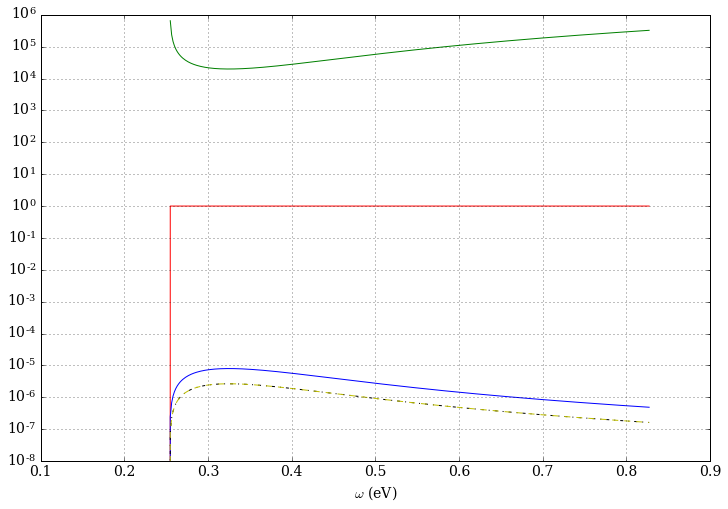

In [14]:
%pylab inline 

from scipy import constants
import numpy as np
import math
from Electromagnetics.graphene import *

N = 400
f0 = 40.01*constants.tera
f1 = 200.0*constants.tera
f = np.linspace(f0, f1, N)
omega = 2.0*math.pi*f

tau = 0.2*constants.pico
mu_c = 0.1*constants.eV
T = 300.001
B_0 = 0.0
eps_r1, mu_r1 = 10.0, 1.0
eps_r2, mu_r2 = 10.0001, 1.00002
k_k0_p = None
if False:#eps_r1==eps_r2 and mu_r1==mu_r2:
    k_k0_p = plasmonDispersion_normalized(mu_c, omega, tau, T, cond='Kubo', eps_r1=eps_r1, mu_r1=mu_r1, 
            eps_r2=eps_r2, mu_r2=mu_r2)
    k_k0_p *= (np.imag(k_k0_p)<=0.0)
else:
    print('-----')
    k_k0_p = plasmonDispersion_TE_normalized(mu_c, omega, tau, T, cond='Kubo', eps_r1=eps_r1, mu_r1=mu_r1, 
            eps_r2=eps_r2, mu_r2=mu_r2)
    k_k0_p *= (np.imag(k_k0_p)<=0.0)
    
alpha1_k0_p = np.sqrt(k_k0_p**2 - eps_r1*mu_r1)
alpha2_k0_p = np.sqrt(k_k0_p**2 - eps_r2*mu_r2)

figsize(12, 8)
font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 14}
matplotlib.rc('font', **font)

omega = 2.0*pi*f*constants.hbar/constants.e

plot(omega, np.real(k_k0_p), 'r', label='$\\Re(k_z/k_0)$')
plot(omega, -np.imag(k_k0_p), 'b', label='$\\Im(k_z/k_0)$')
plot(omega, -np.real(k_k0_p)/(2.0*np.pi*np.imag(k_k0_p)), 'g', label='$\\zeta/\\lambda$')
#plot(omega, -1.0/(2.0*np.pi*np.imag(k_k0_p)), 'g-.', label='$\\zeta/\\lambda$')
plot(omega, np.real(alpha1_k0_p), 'k-.', label='$\\Re(\\alpha/k_0$)')
plot(omega, np.real(alpha2_k0_p), 'y--', label='$\\Re(\\alpha/k_0$)')
xlabel('$\\omega$ (eV)')
grid()

if not np.all(k_k0_p==0.0):
    yscale('log')

show()



### Graphene magnetoplasmon dispersion

In [3]:
from sympy import *
from Electromagnetics.VectorCalculus import *
from IPython.display import display, Math, Latex

init_printing()

x, y, z = symbols('x y z')
Ex1 = Symbol('E_{x1}')
Ey1 = Symbol('E_{y1}')
Ez1 = Symbol('E_{z1}')
alpha = Symbol('\\alpha')
k, k0 = symbols('k k_0')
omega = Symbol('\\omega')
eps, mu, eta = symbols('\\eps \\mu \\eta')
sigma_d, sigma_o = symbols('\\sigma_d, \\sigma_o')

E1 = Matrix([[Ex1, Ey1, Ez1]])*exp(-I*k*z-alpha*y)       # upper region
E2 = Matrix([[Ex1, -Ey1, Ez1]])*exp(-I*k*z+alpha*y)       # lower region

display(Math('E_1 = ' + latex(E1)))
display(Math('E_2 = ' + latex(E2)))


H1 = -1/(I*omega*mu)*curl_r(E1)
H2 = -1/(I*omega*mu)*curl_r(E2)

H1 = Matrix([[H1[i].doit() for i in range(H1.cols)]])
H2 = Matrix([[H2[i].doit() for i in range(H2.cols)]])

display(Math('H_1 = ' + latex(H1)))
display(Math('H_2 = ' + latex(H2)))


sigma = Matrix([[sigma_d, 0, -sigma_o], [0, 0, 0], [sigma_o, 0, sigma_d]])
display(Math('\sigma = ' + latex(sigma)))


a_y = Matrix([[0, 1, 0]])

A = simplify((crossproduct(a_y, (H1-H2)) - (sigma*E1.T).T).subs(y, 0)*exp(I*k*z))
A = A.T
display(Math('A = ' + latex(A)))
print(latex(A))

div_E1 = divergence_r(E1).doit()
Ey1_rep = solve(div_E1, Ey1)[0]
display(Math('E_{y1} = ' + latex(Ey1_rep)))
print(latex(Ey1_rep))

B = A.subs([(Ey1, Ey1_rep), (k**2, k0**2+alpha**2)])
B_coeff = simplify(Matrix([[B[0].subs([(Ex1, 0), (Ez1, 1)]), B[0].subs([(Ex1, 1), (Ez1, 0)])], 
                  [B[2].subs([(Ex1, 0), (Ez1, 1)]), B[2].subs([(Ex1, 1), (Ez1, 0)])]]))

display(Math('B_\\text{coeff} = ' + latex(B_coeff.subs(omega, k0/(mu*eta)))))
print(latex(B_coeff))


Alpha = Symbol('Alpha')
s, s_d, s_o = symbols('s s_d s_o')

s_sub = 1+s_d**2+s_o**2
display(Math(latex(s) + ' = ' + latex(s_sub)))
display(Math(latex(s_d) + ' = ' + latex(sigma_d/(eta*2))))
display(Math(latex(s_o) + ' = ' + latex(sigma_o/(eta*2))))
display(Math(latex(Alpha) + ' = ' + latex(alpha/(I*k0))))


B_det = simplify(B_coeff.det().subs([(omega, k0/(mu*eta)), (alpha, Alpha*I*k0), (sigma_d, s_d*eta*2), (sigma_o, s_o*eta*2)]))
B_det = B_det.subs((1+s_d**2+s_o**2), s)
display(Math('det(B) = '+latex(B_det)))

print('dispersion :')
Alpha_i = simplify(Matrix(solve(B_det, Alpha)))
display(Math(latex(Alpha)+' = ' + latex(Alpha_i)))
print(latex(Alpha_i))

display(Math('k_z = \sqrt{k_0^2 + \\alpha^2}' ))

B_coeff = simplify(B_coeff.subs([(omega, k0/(mu*eta)), (alpha, Alpha*I*k0), (sigma_d, s_d*eta*2), (sigma_o, s_o*eta*2)]))
B_coeff = B_coeff.subs([(Alpha, Alpha_i[0]), (s, s_sub)]).simplify()
Ez_Ex = (-B_coeff[0,0]/B_coeff[0,1]).simplify()
display(Math(latex(Ez1/Ex1) + ' = ' + latex(Ez_Ex)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

\left[\begin{matrix}\frac{2 i E_{{x1}} \alpha}{\mu \omega} - E_{{x1}} \sigma_{d} + E_{{z1}} \sigma_{o}\\0\\\frac{1}{\mu \omega} \left(- \mu \omega \left(E_{{x1}} \sigma_{o} + E_{{z1}} \sigma_{d}\right) + 2 i \left(- i E_{{y1}} k + E_{{z1}} \alpha\right)\right)\end{matrix}\right]


<IPython.core.display.Math object>

- \frac{i E_{{z1}}}{\alpha} k


<IPython.core.display.Math object>

\left[\begin{matrix}\sigma_{o} & \frac{2 i \alpha}{\mu \omega} - \sigma_{d}\\- \sigma_{d} - \frac{2 i k_{0}^{2}}{\alpha \mu \omega} & - \sigma_{o}\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

dispersion :


<IPython.core.display.Math object>

\left[\begin{matrix}\frac{1}{2 s_{d}} \left(- s + \sqrt{\left(s - 2 s_{d}\right) \left(s + 2 s_{d}\right)}\right)\\- \frac{1}{2 s_{d}} \left(s + \sqrt{s^{2} - 4 s_{d}^{2}}\right)\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Numerical

Populating the interactive namespace from numpy and matplotlib
n_e:  [1.8385811127017875, -0.0]
tau__:  1.4000000000000003e-13


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


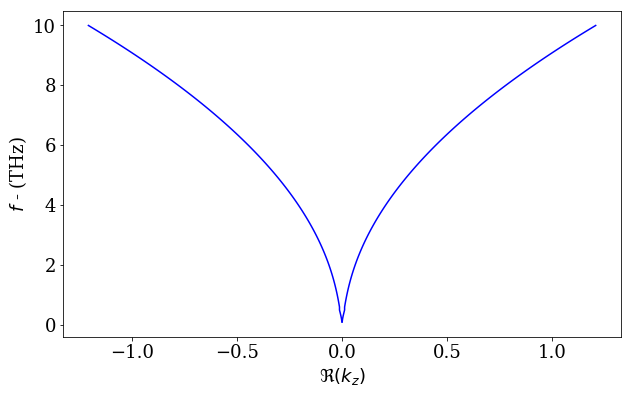

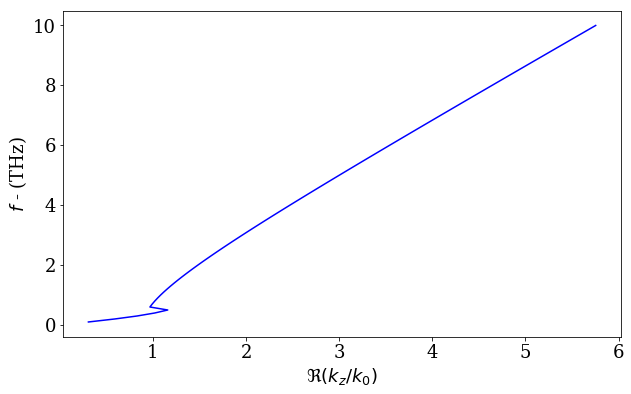

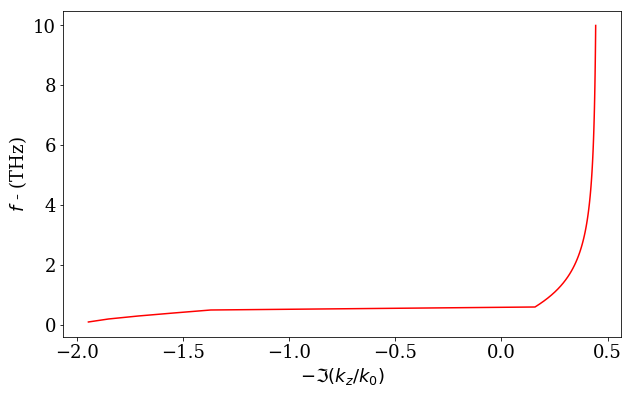

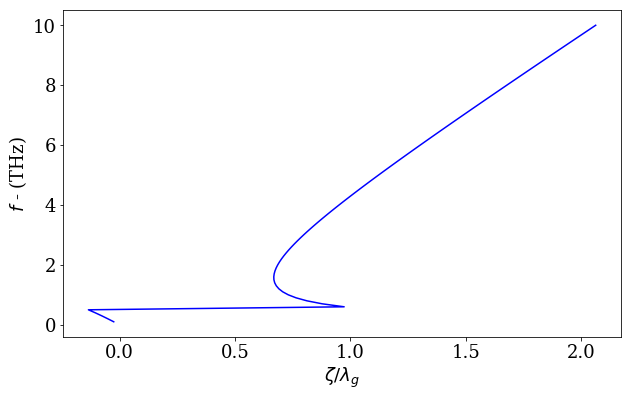

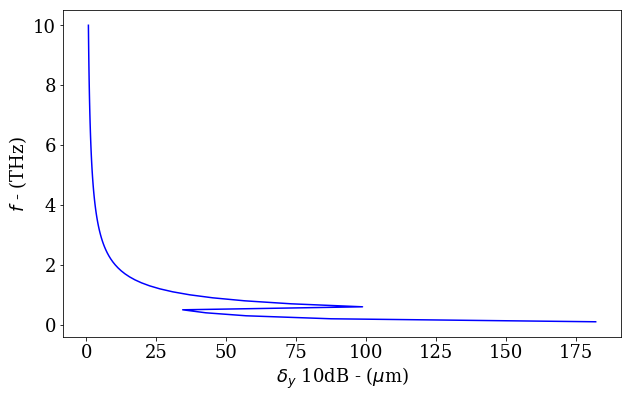

In [12]:
%pylab inline 

from scipy import constants
import numpy as np
import math
from Electromagnetics.graphene import *

N = 100
f0 = 0.1*constants.tera
f1 = 10.0*constants.tera
f = np.linspace(f0, f1, N)
omega = 2.0*math.pi*f

tau = 0.2*constants.pico
mu_c = 0.5*constants.eV
T = 100
B_0 = 0.0
k_k0_p, k_k0_m = magnetoplasmonDispersion_normalized(mu_c, B_0, omega, tau, T, cond='Drude') ##cond=Kubo/Drude


n_e = carrierDensity(mu_c, T)
n_e = [n_e[i]*1.0e-4/1.0e13 for i in range(len(n_e))]
print('n_e: ', n_e)

mu_e = 2800.0*1.0e-4
tau__ = mobilityToScatteringTime(mu_e, mu_c)
print('tau__: ', tau__)

figsize(10, 6)
font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

plot(np.real(k_k0_p)*omega/constants.c/1.0e6, f/constants.tera, 'b')
plot(-np.real(k_k0_p)*omega/constants.c/1.0e6, f/constants.tera, 'b')
xlabel('$\\Re(k_z)$')
ylabel('$f$ - (THz)')
savefig('other/g-disp.png')
show()

plot(np.real(k_k0_p), f/constants.tera, 'b')
xlabel('$\\Re(k_z/k_0)$')
ylabel('$f$ - (THz)')
show()

plot(-np.imag(k_k0_p), f/constants.tera, 'r')
xlabel('$-\\Im(k_z/k_0)$')
ylabel('$f$ - (THz)')
show()

plot(-np.real(k_k0_p)/(np.imag(k_k0_p)*2.0*math.pi), f/constants.tera, 'b')
xlabel('$\\zeta/\\lambda_g$')
ylabel('$f$ - (THz)')
show()

alpha_y_p = np.real(np.sqrt(k_k0_p - 1.0)*omega/constants.c)
delta_y_10dB = 10.0**(-0.5)/alpha_y_p ##20*log10(alpha_y*delta_y) = -10
plot(np.real(delta_y_10dB)/constants.micro, f/constants.tera, 'b')
xlabel('$\\delta_y$ 10dB - ($\\mu$m)')
ylabel('$f$ - (THz)')
show()


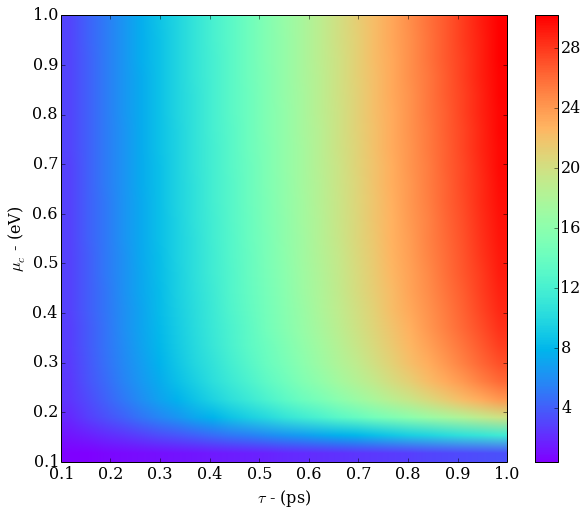

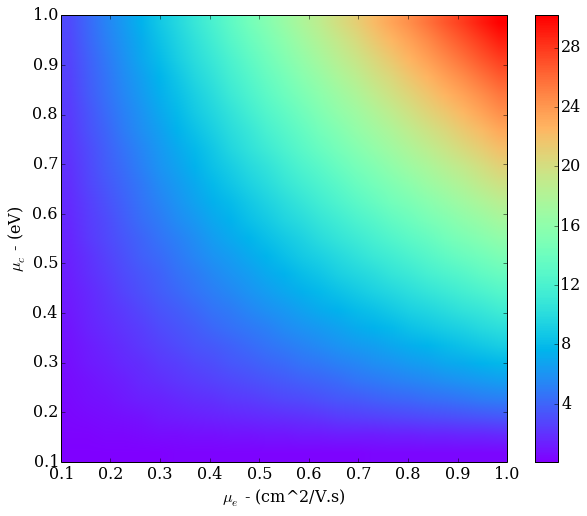

In [56]:

N = 25
tau_st, tau_end = 0.1, 1.0
mu_c_st, mu_c_end = 0.1, 1.0
tau = np.linspace(tau_st, tau_end, N)*constants.pico
mu_c = np.linspace(mu_c_st, mu_c_end, N)*constants.eV
mobil_st, mobil_end = 0.1, 1.0
mobility = np.linspace(mobil_st, mobil_end, N)*1.0e4*1.0e-4
T = 300
B_0 = 1.0
f = 30.0*constants.tera
omega = np.array([2.0*math.pi*f])


tau, mu_c_tau = np.meshgrid(tau, mu_c)
mobility, mu_c_mobil = np.meshgrid(mobility, mu_c)
prop_len = np.zeros(tau.shape, dtype=float)
prop_len_ = np.zeros(tau.shape, dtype=float)

for i in range(N):
    for j in range(N):
        k_k0_p, k_k0_m = magnetoplasmonDispersion_normalized(mu_c_tau[i,j], B_0, omega, tau[i,j], T, cond='Kubo')
        prop_len[i, j] = -np.real(k_k0_p)/(np.imag(k_k0_p)*2.0*math.pi)
        tau__ = mobilityToScatteringTime(mobility[i,j], mu_c_mobil[i, j])
        k_k0_p, k_k0_m = magnetoplasmonDispersion_normalized(mu_c_mobil[i,j], B_0, omega, tau__, T, cond='Kubo')
        prop_len_[i, j] = -np.real(k_k0_p)/(np.imag(k_k0_p)*2.0*math.pi)

figsize(10, 10)
font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

Z = prop_len
im = plt.imshow(Z, interpolation='bilinear', cmap=cm.rainbow,
                origin='lower', extent=[tau_st, tau_end, mu_c_st, mu_c_end],
                vmax=abs(Z).max(), vmin=abs(Z).min())

xlabel('$\\tau$ - (ps)')
ylabel('$\\mu_c$ - (eV)')
CBI = plt.colorbar(im, orientation='vertical', shrink=0.8)
show()


Z = prop_len_
im2 = plt.imshow(Z, interpolation='bilinear', cmap=cm.rainbow,
                origin='lower', extent=[mobil_st, mobil_end, mu_c_st, mu_c_end],
                vmax=abs(Z).max(), vmin=abs(Z).min())

xlabel('$\\mu_e$ - (cm^2/V.s)')
ylabel('$\\mu_c$ - (eV)')
CBI2 = plt.colorbar(im2, orientation='vertical', shrink=0.8)
show()



In [64]:
20.0*math.log10(math.exp(-1.0))

-8.685889638065037